<a href="https://colab.research.google.com/github/zheien/SC1015_A128_team7_MiniProject/blob/main/SC1015_A128_team7_MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Accuractely predicting the risk of a person getting cardiovascular disease based on paramters from their personal and health data¶

# Data Extraction and Cleaning

In [ ]:
# Import the tools for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.graph_objects as go
from pandas.api.types import CategoricalDtype

sb.set()

In [ ]:
# Data extraction
df = pd.read_csv("/cardio_train.csv", sep= ';',index_col="id")
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
# Print statistical description

df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
age,70000.0,19468.865814,2467.251667,10798.0,17664.0,19703.0,21327.0,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.0,1.0,2.0,2.0
height,70000.0,164.359229,8.210126,55.0,159.0,165.0,170.0,250.0
weight,70000.0,74.205690,14.395757,10.0,65.0,72.0,82.0,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.0,120.0,140.0,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.0,80.0,90.0,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.0,1.0,2.0,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.0,1.0,1.0,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.0,0.0,0.0,1.0
alco,70000.0,0.053771,0.225568,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Check for the duplicate data

print("Num of duplicates", df.duplicated().sum())

Num of duplicates 24


In [ ]:
# removing rows with duplicate data

df = df.drop_duplicates()
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
# check for missing data

totalNa = df.isnull().sum().sort_values(ascending=False)
percentNa = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([totalNa, percentNa], axis=1, keys=['TotalNa', 'PercentNa'])
missing_data.head(20)

,TotalNa,PercentNa
age,0,0.0
gender,0,0.0
height,0,0.0
weight,0,0.0
ap_hi,0,0.0
ap_lo,0,0.0
cholesterol,0,0.0
gluc,0,0.0
smoke,0,0.0
alco,0,0.0


In [ ]:
# Check data types
df.info()

df.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69976 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          69976 non-null  int64  
 1   gender       69976 non-null  int64  
 2   height       69976 non-null  int64  
 3   weight       69976 non-null  float64
 4   ap_hi        69976 non-null  int64  
 5   ap_lo        69976 non-null  int64  
 6   cholesterol  69976 non-null  int64  
 7   gluc         69976 non-null  int64  
 8   smoke        69976 non-null  int64  
 9   alco         69976 non-null  int64  
 10  active       69976 non-null  int64  
 11  cardio       69976 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


age            8076
gender            2
height          109
weight          287
ap_hi           153
ap_lo           157
cholesterol       3
gluc              3
smoke             2
alco              2
active            2
cardio            2
dtype: int64

In [ ]:
# The data description shows that there are a few categorical variables: gender, cholesterol, gluc, smoke, alco and active

# Check Category data
df[['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']].describe()

,gender,cholesterol,gluc,smoke,alco,active
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,1.349648,1.366997,1.226535,0.088159,0.053790,0.803718
std,0.476862,0.680333,0.572353,0.283528,0.225604,0.397187
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000
max,2.000000,3.000000,3.000000,1.000000,1.000000,1.000000


**Clean Datasets**

In [ ]:
df.nunique()

age            8076
gender            2
height          109
weight          287
ap_hi           153
ap_lo           157
cholesterol       3
gluc              3
smoke             2
alco              2
active            2
cardio            2
dtype: int64

In [ ]:
# age is in days so we divide it make it 
df['age'] = round(df['age'] / 365, 1)

In [ ]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50.4,2,168,62.0,110,80,1,1,0,0,1,0
1,55.4,1,156,85.0,140,90,3,1,0,0,1,1
2,51.7,1,165,64.0,130,70,3,1,0,0,0,1
3,48.3,2,169,82.0,150,100,1,1,0,0,1,1
4,47.9,1,156,56.0,100,60,1,1,0,0,0,0


<Axes: >

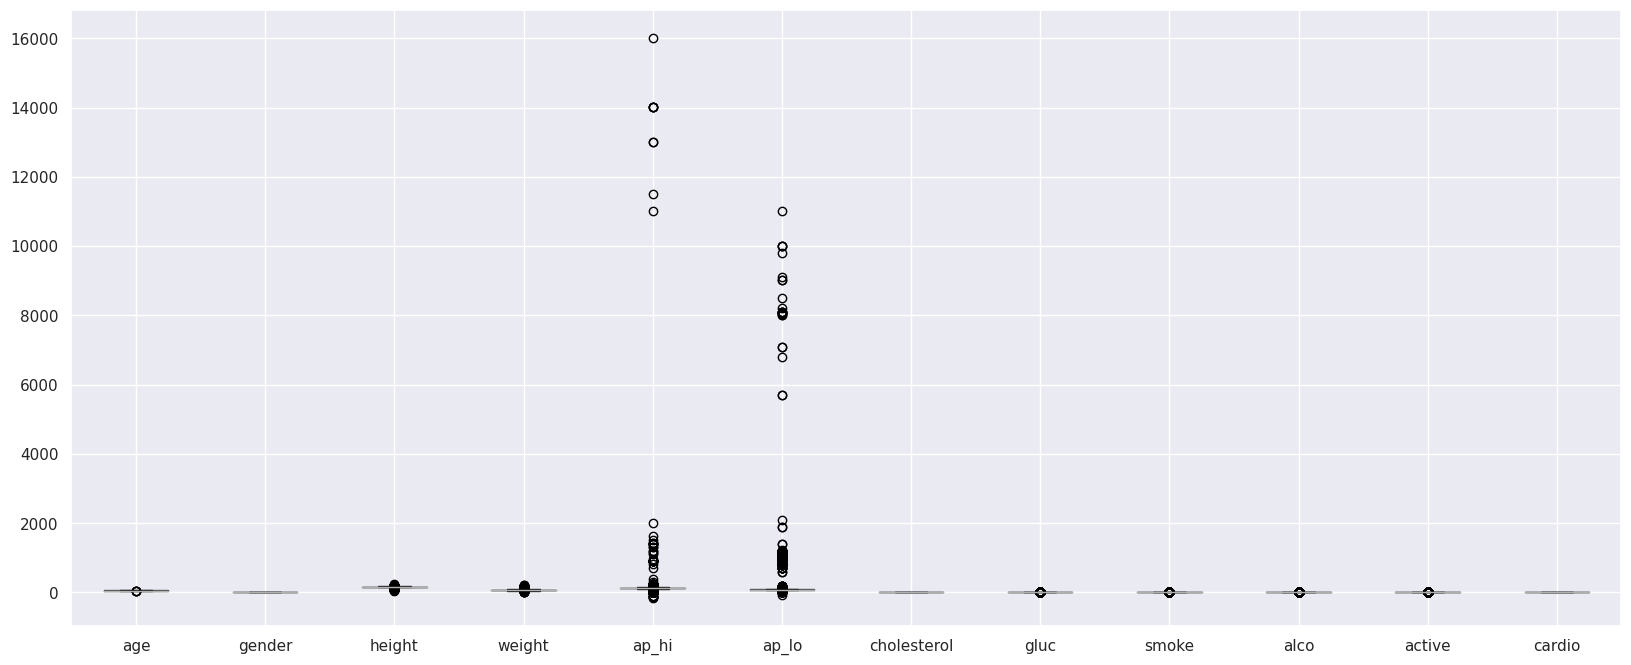

In [ ]:
#check for outliers
plt.figure(figsize=(20,8))
df.boxplot()

In [ ]:
# find out age range of people in our datasets
print(df.age.min())
print(df.age.max())

29.6
65.0


In [ ]:
# Print statistical description to see any data out of range that we want to remove
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,69976.0,53.339716,6.759870,29.6,48.4,54.0,58.4,65.0
gender,69976.0,1.349648,0.476862,1.0,1.0,1.0,2.0,2.0
height,69976.0,164.359152,8.211218,55.0,159.0,165.0,170.0,250.0
weight,69976.0,74.208519,14.397211,10.0,65.0,72.0,82.0,200.0
ap_hi,69976.0,128.820453,154.037729,-150.0,120.0,120.0,140.0,16020.0
ap_lo,69976.0,96.636261,188.504581,-70.0,80.0,80.0,90.0,11000.0
cholesterol,69976.0,1.366997,0.680333,1.0,1.0,1.0,2.0,3.0
gluc,69976.0,1.226535,0.572353,1.0,1.0,1.0,1.0,3.0
smoke,69976.0,0.088159,0.283528,0.0,0.0,0.0,0.0,1.0
alco,69976.0,0.053790,0.225604,0.0,0.0,0.0,0.0,1.0


data that we might want to look into: min height: 55kg and max height: 250kg, min weight: 10kg, exteremely high positive values and negative values of ap_hi(Systolic blood pressure) & ap_lo(Diastolic blood pressure).

These data should fit be for adults aged 30-65

In [ ]:
# look at data for adults under 80cm
df[df['height'] <80]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
309,59.7,2,76,55.0,120,80,1,1,0,0,1,0
10843,40.2,2,70,72.0,120,8,1,1,0,0,1,0
18218,53.7,1,75,168.0,120,80,1,1,1,0,1,1
18928,61.5,2,71,68.0,120,80,3,1,0,0,1,0
20459,60.3,1,67,57.0,120,90,1,1,0,0,1,1
21686,43.3,1,70,68.0,120,80,1,1,0,0,0,0
23859,53.9,2,74,98.0,140,90,1,1,0,0,1,1
32207,39.8,1,68,65.0,100,60,1,1,0,0,0,0
32456,64.1,1,55,81.0,130,90,1,1,0,0,1,1


In [ ]:
# look at data for adults above 200cm
df[df['height'] > 200]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
9223,58.1,1,250,86.0,140,100,3,1,0,0,1,1
30894,52.2,2,207,78.0,100,70,1,1,0,1,1,0


In [ ]:
# look at data for adults under 40kg
df[df['weight'] <= 40]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
3187,41.9,1,152,40.0,110,60,1,1,0,0,1,0
3490,40.6,1,152,40.0,120,80,1,1,0,0,0,0
3753,56.4,1,142,40.0,135,90,2,1,0,0,1,1
5306,42.2,1,120,30.0,110,70,1,1,0,0,1,0
8226,48.4,1,151,37.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
92896,62.2,1,145,33.0,130,1000,2,1,0,0,1,1
93697,52.4,1,147,38.0,100,70,3,3,0,0,1,0
94619,62.2,2,154,40.0,110,70,1,1,1,0,1,0


In [ ]:
# look at data for adults above 200kg
df[df['weight'] >= 200]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
618,45.9,1,186,200.0,130,70,1,1,0,0,0,0
71945,41.4,2,180,200.0,150,90,1,1,0,0,1,1


In [ ]:
# keep data range that we want

df = df[df['height'] >= 80] 
df = df[df['height'] <= 200] 
df = df[df['weight'] >= 40]

In [ ]:
# Insert a 'BMI'(Body Mass Index) column using the formula BMI = Weight/Height^2 to find if there are more values that are out of range
df.insert(5, 'bmi', round((df['weight']/(df['height']/100)**2), 2))
df.describe()

,age,gender,height,weight,ap_hi,bmi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69900.000000,69900.00000,69900.000000,69900.000000,69900.000000,69900.000000,69900.000000,69900.000000,69900.000000,69900.000000,69900.000000,69900.000000,69900.000000
mean,53.338562,1.34980,164.397511,74.238687,128.833190,27.524912,96.618498,1.367139,1.226595,0.088197,0.053791,0.803705,0.499900
std,6.759526,0.47691,8.010768,14.356118,154.119211,5.543221,188.505199,0.680440,0.572427,0.283584,0.225607,0.397197,0.500004
min,29.600000,1.00000,80.000000,40.000000,-150.000000,13.520000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.400000,1.00000,159.000000,65.000000,120.000000,23.880000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.00000,165.000000,72.000000,120.000000,26.400000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.400000,2.00000,170.000000,82.000000,140.000000,30.220000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.00000,200.000000,200.000000,16020.000000,278.120000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


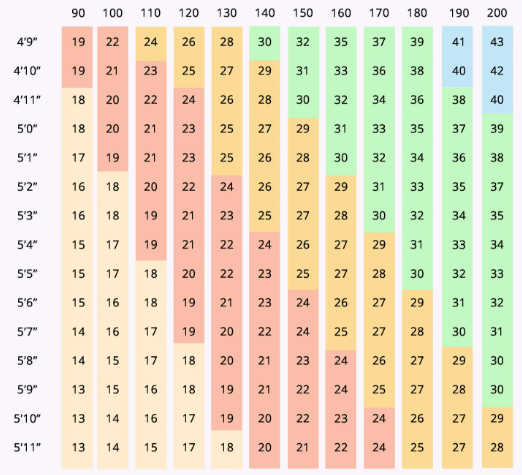

In [ ]:
# Drop outliers in BMI
df.drop(df.query('bmi >50 or bmi <10').index, axis=0, inplace=True)

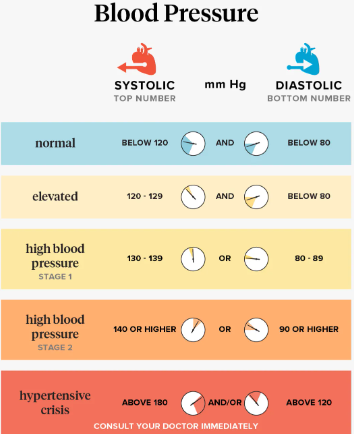

In [ ]:
# keep data range that we want

# df = df[df['ap_hi'] >= 80]
# df = df[df['ap_hi'] <= 210]
# df = df[df['ap_lo'] >= 50]
# df = df[df['ap_lo'] <= 150]

In [ ]:
# Categorize blood pressure stages according to systolic and diastolic blood pressure
def BPCategorize(x,y):
    if x<=120 and y<=80:
        return 'normal'
    elif x<=129 and y<=80:
        return 'elevated'
    elif x<=139 or y<=89:
        return 'high 1'
    elif x<=180 or y<=120:
        return "high 2"
    elif x>180 or y>=120:
        return 'high 3'
    else:
        return None
    
df.insert(8, "bp_cat", df.apply(lambda row: BPCategorize(row['ap_hi'], row['ap_lo']), axis=1))
df['bp_cat'].value_counts()

normal      38902
high 1      15330
high 2      14953
elevated      418
high 3         75
Name: bp_cat, dtype: int64

In [ ]:
# Dropping the blood pressure variable outliers and keep data range that we want
df.drop(df.query('ap_hi >=210 or ap_lo >=150 or ap_hi<=80 or ap_lo<=50').index, axis=0, inplace=True)

In [ ]:
df.head()

,age,gender,height,weight,ap_hi,bmi,ap_lo,cholesterol,bp_cat,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,,,
0,50.4,2,168,62.0,110,21.97,80,1,normal,1,0,0,1,0
1,55.4,1,156,85.0,140,34.93,90,3,high 2,1,0,0,1,1
2,51.7,1,165,64.0,130,23.51,70,3,high 1,1,0,0,0,1
3,48.3,2,169,82.0,150,28.71,100,1,high 2,1,0,0,1,1
4,47.9,1,156,56.0,100,23.01,60,1,normal,1,0,0,0,0


In [ ]:
# look at percentage of people with and without cardiovascular disease
df.cardio.value_counts(normalize= True)

0    0.505307
1    0.494693
Name: cardio, dtype: float64

In [ ]:
# check if there are still missing values
display(df.isnull().any())
print(df.shape)
print("Num of duplicates",  df.duplicated().sum())

age            False
gender         False
height         False
weight         False
ap_hi          False
bmi            False
ap_lo          False
cholesterol    False
bp_cat         False
gluc           False
smoke          False
alco           False
active         False
cardio         False
dtype: bool

(68208, 14)
Num of duplicates 641


In [ ]:
# Save into csv for exploratory data analysis
#df.to_csv("cardiovascular-study-dataset.csv")


#remove this before submission
#this is to save the file into our drive
#df.to_csv('/drive/My Drive/SC1015/cardiovascular-study-dataset.csv')

**Summary of Data:**


1.   70,000-> 68422 data, 1,578 data cleaned
2.   50% of patients without cardiovascular disease
3.   Contains adults aged 30-65
4.   weight range: 40-200kg
4.   height range: 80cm-200cm
5.   gender: 1->women 2->men
6.   ap_hi: 80-210
7.   ap_low: 50-150
8.   cholesterol: 1-3, 1:normal, 2: above normal 3:well above normal
9.   glucose: 1-3, 1:normal, 2: above normal 3:well above normal
10.  smoke: 1-2, 1:patient smokes, 0:patient does not smoke
11.  alco: 1-2, 1:patient drinks alcohol, 0:patient does not drink alcohol
12.  active: 1-2, 1:patient is active, 0:patient is not active
13. cardio: 1-2, 1: Presence of cardiovascular disease, 0: absence of cardiovascular disease



**End of data cleaning**

To conclude, we did:

imputation
discretization
removing outliers
Cleaned the dataset

Learning points

Data available on kaggle is not always ideal an pre-processing is needed

Different feature engineering techniques we can apply to a dataset to make the data more symmetrical

# Exploratory Data Analysis

In [ ]:
# check unique values for each variable to split data into categorical and numerical variables
df.nunique()

age             262
gender            2
height           71
weight          241
ap_hi            99
bmi            2151
ap_lo            74
cholesterol       3
bp_cat            5
gluc              3
smoke             2
alco              2
active            2
cardio            2
dtype: int64

In [ ]:
# Extracting categorical features
categorical_data = ['gender', 'cholesterol', 'bp_cat', 'gluc', 'smoke', 'alco', 'active']
print(categorical_data)

['gender', 'cholesterol', 'bp_cat', 'gluc', 'smoke', 'alco', 'active']


In [ ]:
# print Categorical columns.
df[categorical_data].head()

,gender,cholesterol,bp_cat,gluc,smoke,alco,active
id,,,,,,,
0,2,1,normal,1,0,0,1
1,1,3,high 2,1,0,0,1
2,1,3,high 1,1,0,0,0
3,2,1,high 2,1,0,0,1
4,1,1,normal,1,0,0,0


In [ ]:
numerical_data = ['age','height','weight','ap_hi','ap_lo', 'bmi']
print(numerical_data)

['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi']


In [ ]:
# print numerical columns.
df[numerical_data].head()

,age,height,weight,ap_hi,ap_lo,bmi
id,,,,,,
0,50.4,168,62.0,110,80,21.97
1,55.4,156,85.0,140,90,34.93
2,51.7,165,64.0,130,70,23.51
3,48.3,169,82.0,150,100,28.71
4,47.9,156,56.0,100,60,23.01


**Analyzing Categorical features**

In [ ]:
# look at num of patients with and without cardiovascular disease
df.cardio.value_counts(normalize= True)

0    0.505307
1    0.494693
Name: cardio, dtype: float64

In [ ]:
# Create Helper Functions

# For univariate analysis between binary variable
def ubAnalysis (string,df,state1,state2):
    f = plt.figure(figsize=(16,8))
    sb.catplot(y=string,data=df,kind='count')
    no,yes = df[string].value_counts()
    print("Ratio of classes is \n",state1,' : ',state2,' =\n', no, ":", yes)

Ratio of classes is 
 Risk  :  No risk  =
 34466 : 33742


<Figure size 1600x800 with 0 Axes>

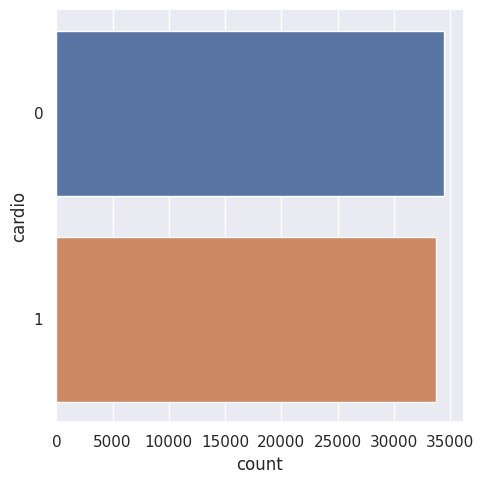

In [ ]:
ubAnalysis("cardio",df,"Risk","No risk")

In [ ]:
df_eda = df.copy()

***Analysis: Gender***

In [ ]:
# Counting the number of males and females.
df["gender"].value_counts()

1    44374
2    23834
Name: gender, dtype: int64

In [ ]:
# Workaround column to get male and female binary data into one data
def gender(x, y):
    if x==1:
        return 'female'
    else:
        return 'male'

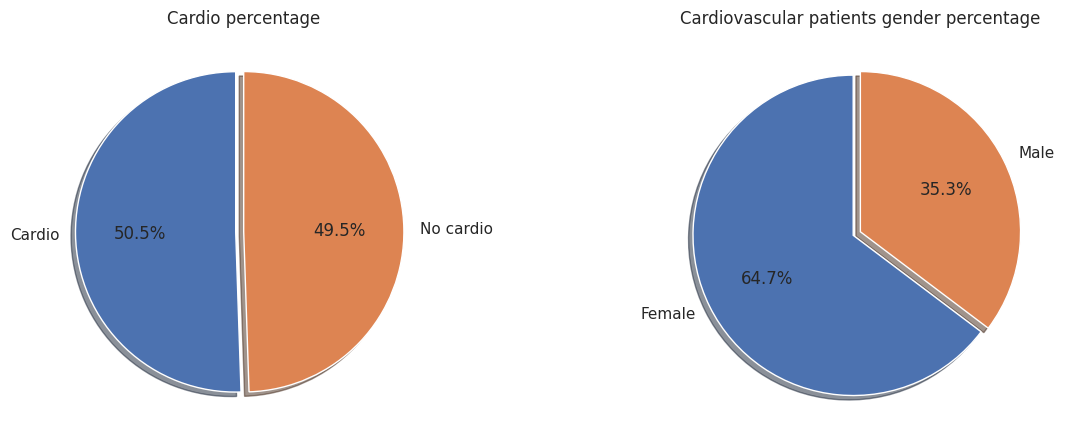

In [ ]:
# Plotting a pie chart of percentage of cardiovascular disease prevalence and
# Plotting a pie chart of percentage of male vs female cardiovascular patients

fig, ax = plt.subplots(1,2, figsize=(14,20))
plt.tight_layout(pad=10)
ax[0].pie(x=df['cardio'].value_counts(), labels=['Cardio', 'No cardio'],autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.05,0.0))
ax[0].title.set_text('Cardio percentage')
gender = df.query("cardio == 1").apply(lambda row: gender(row[1], row[2]), axis=1).value_counts()
ax[1].pie(x=gender, labels=['Female', 'Male'],autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.05,0.0))
ax[1].title.set_text('Cardiovascular patients gender percentage')

- percentage of patients with cardiovascular disease is > 50%
- among them, 35.3% are male and 64.7% are female

***Analysis: Cholesterol***

Note: cholesterol range: 1-3, 

1:normal, 

2: above normal 

3:well above normal

In [ ]:
# look at percentage pf patients in different cholestrol levels

df_eda.cholesterol.value_counts(normalize= True)

1    0.750396
2    0.135131
3    0.114473
Name: cholesterol, dtype: float64

Text(0, 0.5, 'Num of Patients')

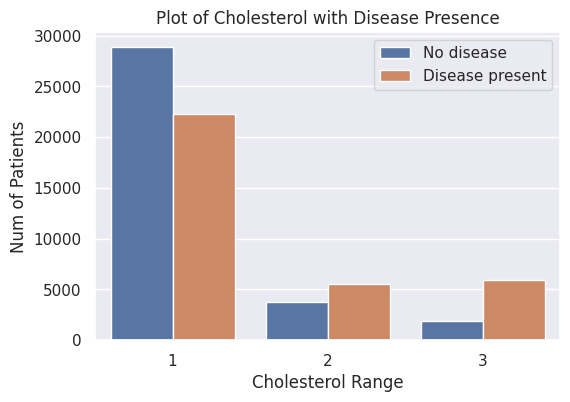

In [ ]:
# Plot of Cholesterol with Disease Presence
plt.figure(figsize= (6,4))
sb.countplot(x= 'cholesterol', hue= 'cardio', data= df_eda)
plt.legend( ['No disease', 'Disease present'])
plt.title('Plot of Cholesterol with Disease Presence')
plt.xlabel('Cholesterol Range')
plt.ylabel('Num of Patients')

Text(12.444444444444452, 0.5, 'Has Disease')

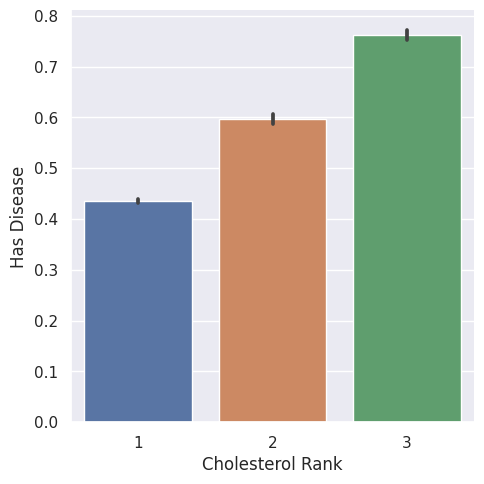

In [ ]:
# Average Risk of Having Disease vs Rank of Cholesterol
sb.catplot(x= 'cholesterol', y= 'cardio', data= df_eda, kind= 'bar')
plt.xlabel('Cholesterol Rank')
plt.ylabel('Has Disease')

From the plot we can see that having cholestrol rank of 2&3 increases your risk of having Cardiovascular Disease(CVD). 

However, having rank 1 does not decrease your chance of getting CVD. We can see that >40% of patients with normal cholestrol level(rank 1) also have CVD

***Analysis: bp_cat***

In [ ]:
# count of patients in each blood pressue category
df_eda.bp_cat.value_counts()

normal      38633
high 1      15063
high 2      14085
elevated      414
high 3         13
Name: bp_cat, dtype: int64

<Axes: xlabel='bp_cat', ylabel='cardio'>

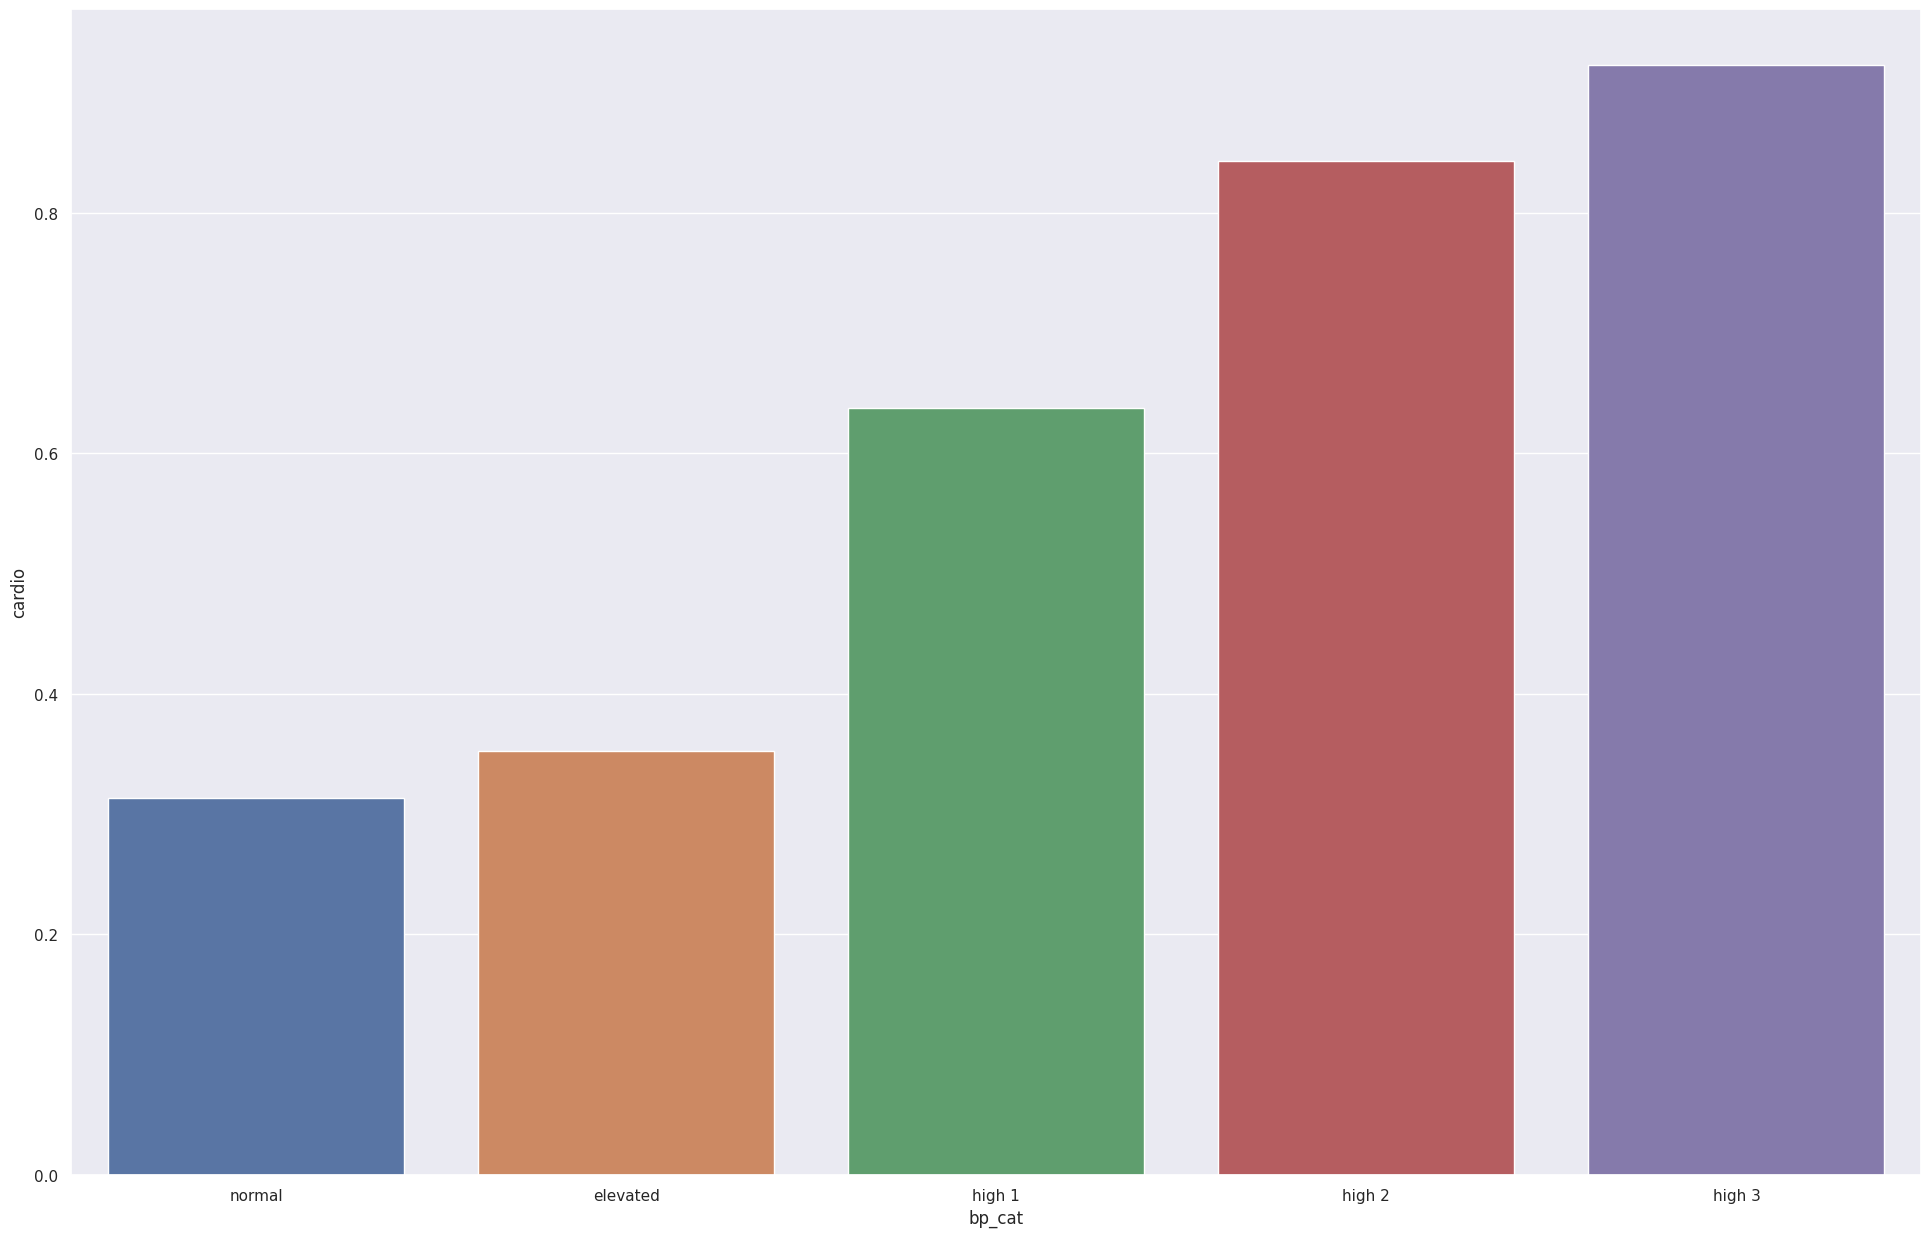

In [ ]:
# plot num of pateints in each blood pressure category 
fig, ax = plt.subplots(figsize=(20,13), sharey=True)
plt.tight_layout(pad=3)

df_bp = df.groupby('bp_cat').mean()
sb.barplot(data=df_bp, x=df_bp.index, y='cardio',
           order=['normal', 'elevated', 'high 1', 'high 2', 'high 3'])


From the plot we notice that groups of patients are more prone to CVD if they have higher blood pressure levels

***Analysis: Glucose Level***

[Text(0, 0.0, '0'),
 Text(0, 0.1, '10'),
 Text(0, 0.2, '20'),
 Text(0, 0.30000000000000004, '30'),
 Text(0, 0.4, '40'),
 Text(0, 0.5, '50'),
 Text(0, 0.6000000000000001, '60'),
 Text(0, 0.7000000000000001, '70'),
 Text(0, 0.8, '80'),
 Text(0, 0.9, '90'),
 Text(0, 1.0, '100'),
 Text(0, 1.1, '110')]

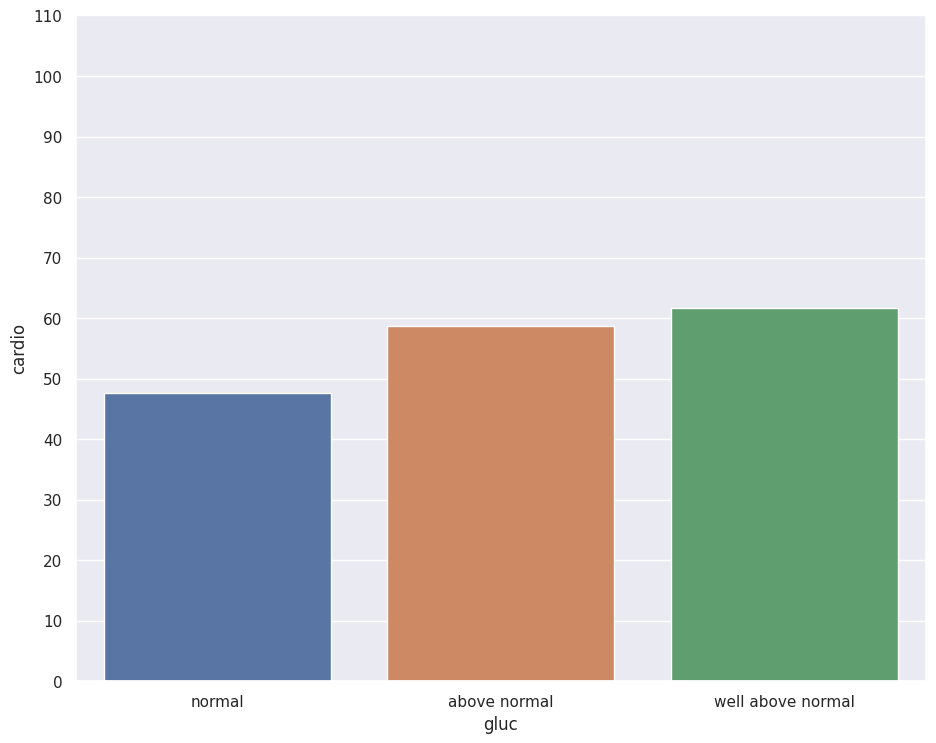

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,8), sharey=True)
plt.tight_layout(pad=3)


df_gluc = df.groupby('gluc').mean()
sb.barplot(data=df_gluc, x=df_gluc.index, y='cardio')
ax.set_xticklabels(['normal', 'above normal', 'well above normal'])
ax.set_yticks(np.arange(0, 1.2, 0.1))
ax.set_yticklabels(np.arange(0, 120, 10))


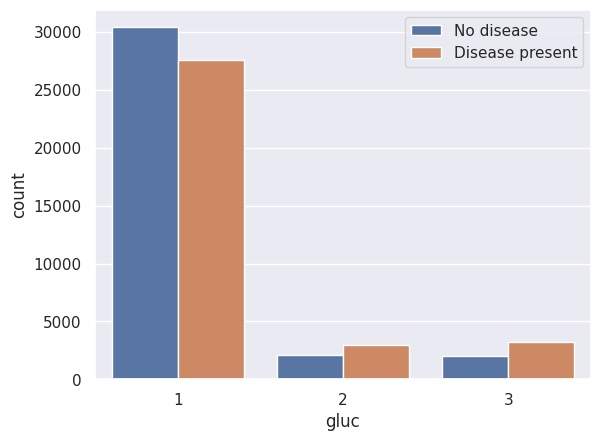

In [ ]:
sb.countplot(x= 'gluc', hue= 'cardio', data= df_eda)
plt.legend( ['No disease', 'Disease present'])

From the plot we observe that a relation is found between the glucose levels and cardiovascular disease, 60% of people who have well above normal levels of glucose are more likely to have a cardiovascular disease. 

However, it should be noted there are no relationship between patients who have normal (rank 1) glucose levels and them having the disease. 

The risk of CVD increases with the increasing levels of glucose.

***Analysis: smoke and alcohol***

Text(0.5, 76.24999999999999, '')

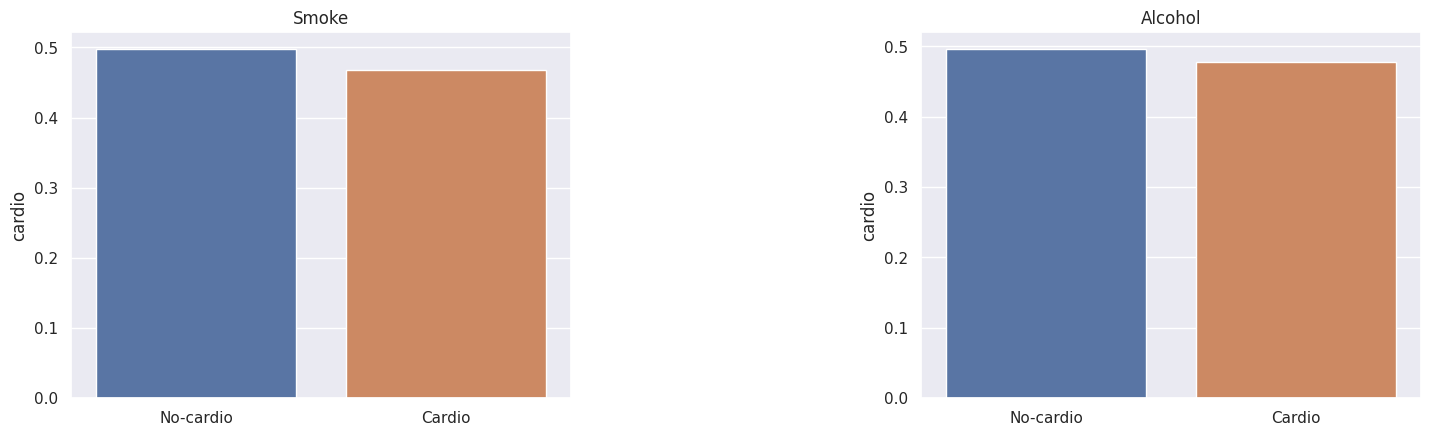

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(20,10))
plt.tight_layout(pad=18)

df_smoke = df.groupby('smoke').mean()
sb.barplot(data=df_smoke, x=df_smoke.index, y='cardio', ax=ax[0])

df_alco = df.groupby('alco').mean()
sb.barplot(data=df_alco, x=df_alco.index, y='cardio', ax=ax[1])

ax[0].title.set_text('Smoke')
ax[0].set_xticklabels(['No-cardio', 'Cardio'])
ax[1].title.set_text('Alcohol')
ax[1].set_xticklabels(['No-cardio', 'Cardio'])
ax[0].set_xlabel("")
ax[1].set_xlabel("")

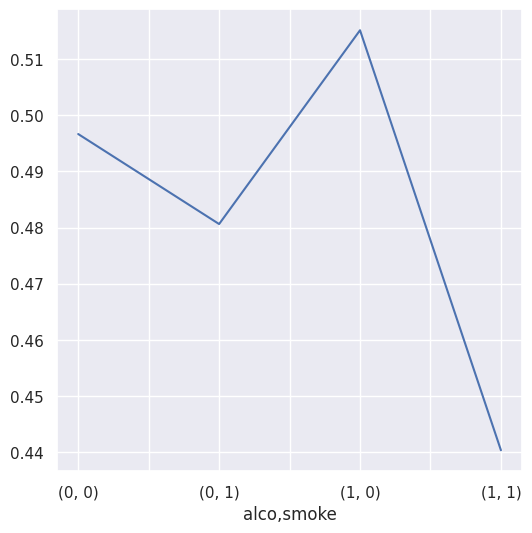

In [ ]:
fig= plt.figure(figsize= (6,6))
al_smo = df_eda.groupby(['alco', 'smoke'])['cardio'].mean().plot()

From the plot we can see that there is no strong bonded relationship between smoking and alcohol with CVD.

In fact, an individual that claims to drink alcohol and smoke shows the lowest risk of CVD. But it does not lead to the conclusion that drinking and smoking prevents CVD as it is still subjective to other factors like how much an individual drinks and smokes.

***Analysis: Active***

Ratio of classes is 
 Risk  :  No risk  =
 54798 : 13410


<Figure size 1600x800 with 0 Axes>

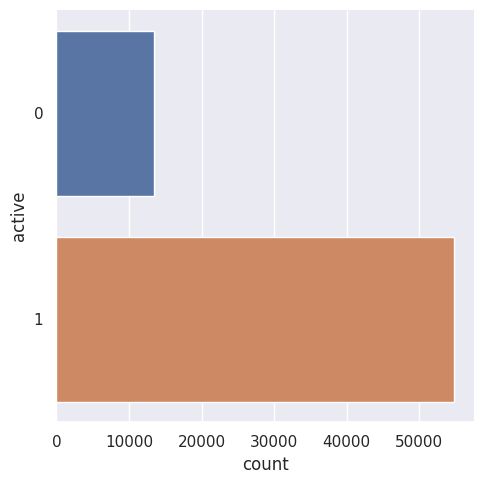

In [ ]:
ubAnalysis("active",df,"Risk","No risk")

In [ ]:
df_eda.active.value_counts(normalize= True)

1    0.803395
0    0.196605
Name: active, dtype: float64

<Axes: xlabel='active', ylabel='cardio'>

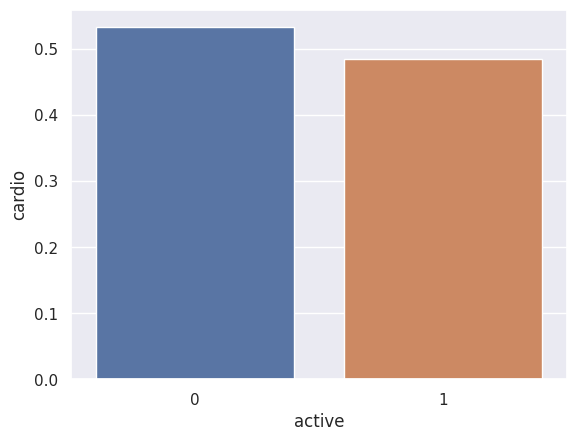

In [ ]:
df_active = df.groupby('active').mean()
sb.barplot(data=df_active, x=df_active.index, y='cardio')

From the graph we can see that there is a minor relationship between being active and CVD.

**Analyzing Numerical features**

***Analysis: Age***

Text(0.5, 0, 'With and Without CVD')

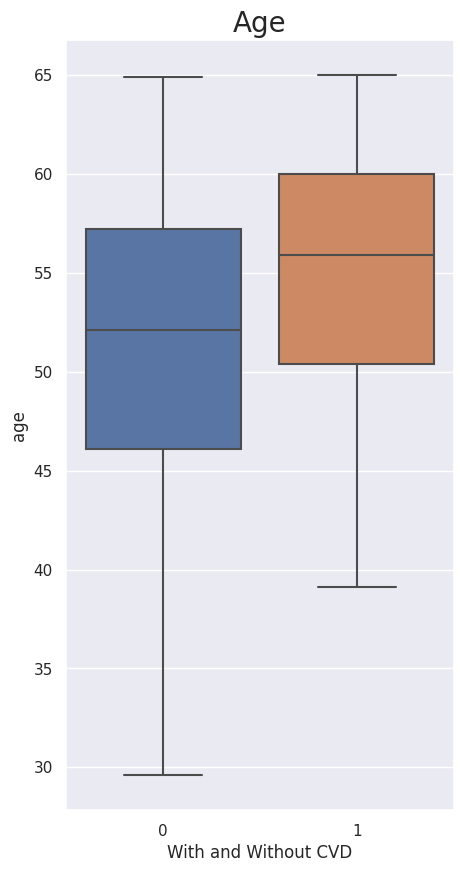

In [ ]:
plt.figure(figsize= (5,10))
sb.boxplot(data=df, x='cardio', y='age')
plt.title('Age', fontsize= 20)
plt.xlabel('With and Without CVD')

In [ ]:
print(df_eda.age.min())
print(df_eda.age.max())

29.6
65.0


In [ ]:
df_eda.loc[(df_eda['age'] < 40), 'age_range'] = 30
df_eda.loc[(df_eda['age'] >= 40) & (df_eda['age'] < 50), 'age_range'] = 40
df_eda.loc[(df_eda['age'] >= 50) & (df_eda['age'] < 60), 'age_range'] = 50
df_eda.loc[(df_eda['age'] >= 60) & (df_eda['age'] < 70), 'age_range'] = 60

In [ ]:
df_eda.age_range.value_counts(normalize= True)

50.0    0.506891
40.0    0.278677
60.0    0.191458
30.0    0.022974
Name: age_range, dtype: float64

Text(0, 0.5, 'Patients')

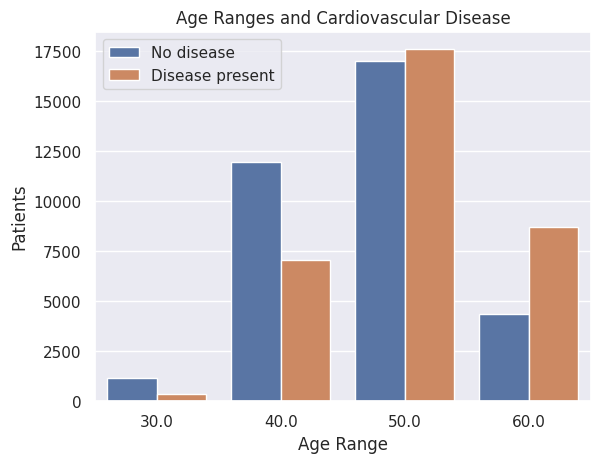

In [ ]:
sb.countplot(x= 'age_range', hue= 'cardio', data= df_eda)
plt.title('Age Ranges and Cardiovascular Disease')
plt.xlabel('Age Range')
plt.legend( ['No disease', 'Disease present'])
plt.ylabel('Patients')

From the graph we can see that as a person grows older, their chances of getting CVD increase.

***Analysis: BMI***

<Axes: xlabel='height', ylabel='weight'>

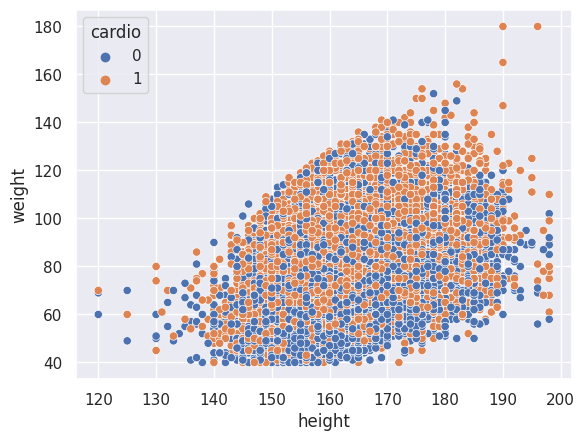

In [ ]:
sb.scatterplot(x= 'height', y= 'weight', hue= 'cardio', data= df_eda)

Analysis the relationship between height and weight with CVD in this plot is not very helpful, therefore we will analysis the BMI data instead.

Body mass index (BMI) is a measure of body fat based on height and weight that applies to adult men and women. BMI is defined as the body mass divided by the square of the body height, and is universally expressed in units of kg/m², resulting from mass in kilograms and height in meters.

Text(0.5, 0, 'With and Without CVD')

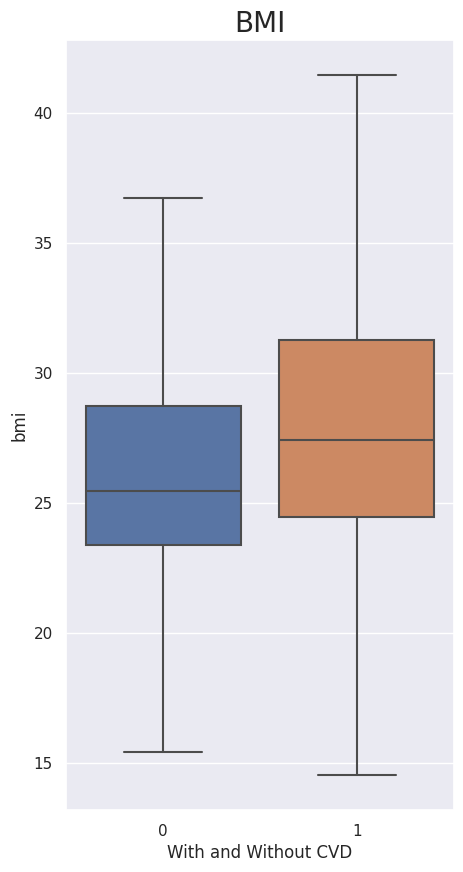

In [ ]:
plt.figure(figsize= (5,10))
sb.boxplot(data=df, x='cardio', y='bmi', showfliers=False)
plt.title('BMI', fontsize= 20)
plt.xlabel('With and Without CVD')

From the boxplot we can see that patients with higher BMI have a stronger relation with CVD 

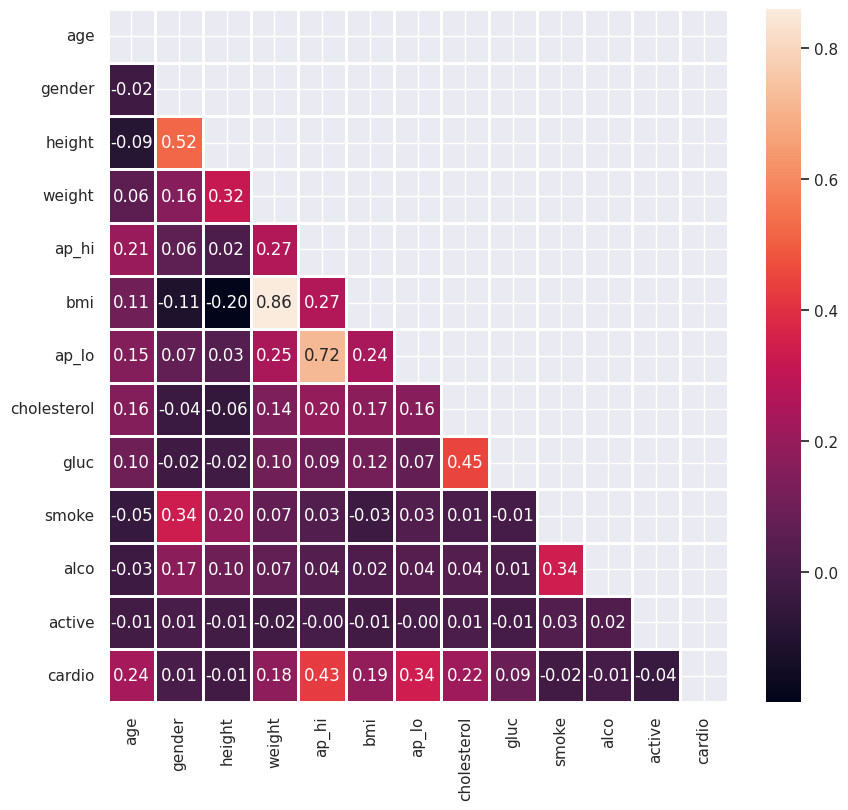

In [ ]:
# Correlation heatmap of the data
corr = df.corr()

plt.figure(figsize= (10 , 9))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sb.heatmap(df.corr(), annot= True, fmt = ".2f", mask= mask, linewidths= 1);

The highest correlation is between systolic and diastolic. Ignoring BMI with weight since BMI uses weight to generate its values. The second highest is between height and gender.

**Probabilities and Statistics**

In [ ]:
df_age_50 = df.query('age >=50')
df_agy_50_cardio = df_age_50.query('cardio==1')
round(df_agy_50_cardio.shape[0]*100/df_age_50.shape[0],2)

55.19

Probability that a person has cardio diseases given that he is 50 or older = 55.12%



In [ ]:
df_bmi37 = df.query('bmi >=37')
df_bmi37_cardio = df_bmi37.query('cardio ==1')
round(df_bmi37_cardio.shape[0]*100/df_bmi37.shape[0],2)

68.75

Probability that a person has cardio diseases given that he has body mass index greater than 37 = 68.55%

In [ ]:
df_high3 = df.query("bp_cat == 'high 3'")
df_high_cardio = df_high3.query('cardio == 1')
round(df_high_cardio.shape[0]*100/df_high3.shape[0],2)

92.31

Probability that a person has cardio diseases given that the patient has a hypertensive crisis = 87.5%

In [ ]:
df_cohol_smoke = df.query("alco==1 or smoke==1")
df_cohol_smoke_cardio = df_cohol_smoke.query('cardio==1')
round(df_cohol_smoke_cardio.shape[0]*100/df_cohol_smoke.shape[0],2)

47.95

Probability that a person has cardio diseases given that the patient drinks alcohol or smokes = 47.13%

In [ ]:
df_not_active = df.query('active==0')
df_not_active_cardio = df_not_active.query('cardio==1')
round(df_not_active_cardio.shape[0]*100/df_not_active.shape[0],2)

53.3

Probability that a person has cardio diseases given that the patient is not active = 53.04%

# Predicting using machine learning techniques

In [ ]:
## Importing machine learning libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_predict, cross_validate, cross_val_score
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix, ConfusionMatrixDisplay
#plot_confusion_matrix, plot_roc_curve
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df.head(3)

,age,gender,height,weight,ap_hi,bmi,ap_lo,cholesterol,bp_cat,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,,,
0,50.4,2,168,62.0,110,21.97,80,1,normal,1,0,0,1,0
1,55.4,1,156,85.0,140,34.93,90,3,high 2,1,0,0,1,1
2,51.7,1,165,64.0,130,23.51,70,3,high 1,1,0,0,0,1


In [ ]:
## Creating the X and Y variables for our model
## bp_cat will be dropped since it is a string
X = df.drop(['cardio', 'bp_cat'], axis=1)
y = df['cardio']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Using Random Forest Classifier

In [ ]:
random_model = RandomForestClassifier(n_estimators=51,
                          max_depth=10,
                          random_state=0)

random_model.fit(X_train, y_train)
print(f"Testing accuracy: {round(accuracy_score(random_model.predict(X_test), y_test),4)*100}%")
print(f"Average testing accuracy: {round(cross_validate(random_model, X, y, cv=5)['test_score'].mean()*100,2)}%")


Testing accuracy: 73.36%
Average testing accuracy: 73.35%


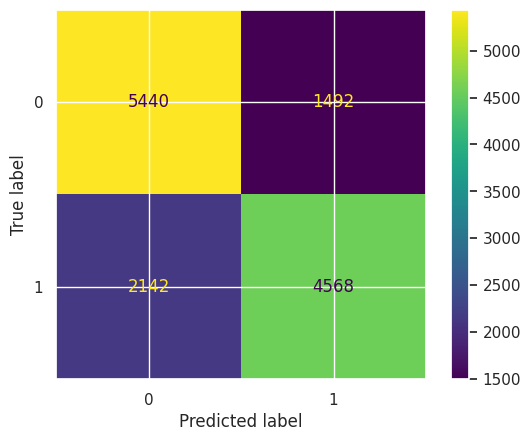

In [ ]:
## Plotting the confusion matrix to view the correct and incorrect predictions
RFConfusionMatrix = confusion_matrix(y_test, random_model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix = RFConfusionMatrix)
disp.plot()

Random Forest Classifier seems to provide accurate classficiations

Now using K Nearest Neighbours (KNN) modelling

In [ ]:
k_model = KNeighborsClassifier(weights = 'uniform',
                               n_neighbors = 300,
                               leaf_size = 1,
                               algorithm = 'ball_tree')
k_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=1, n_neighbors=300)

In [ ]:
k_model_CVScore = cross_val_score(estimator=k_model, X=X_train, y=y_train, cv=5)
print(k_model_CVScore)
# cross_validate(k_model, X, y, cv=5)['test_score'].mean()

[0.72365769 0.7294053  0.71923394 0.72253276 0.71886741]


In [ ]:
## Prediction accuracy of the model
k_pred = k_model.predict(X_test)
print(f"score: {round((accuracy_score(k_pred, y_test)*100),2)}%")

score: 72.11%


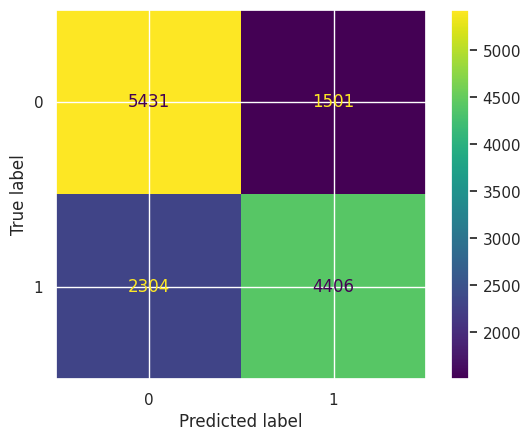

In [ ]:
## Plotting the confusion matrix to view the correct and incorrect predictions
KMConfusionMatrix = confusion_matrix(y_test, k_model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix = KMConfusionMatrix)
disp.plot()

From the 2 machine learning models we have the following conclusions:


1.   Random Forest Classifier model has a prediction accuracy of ~73.4%
2.   K Nearest Neighbours model has a prediction accuracy of ~72.0%


Therefore, both models show significant ability to accurately predict people at risk for cardiovascular diseases.

Random Forest Classifier seems to be a slightly better prediction model for this dataset.